"OM NAMO BHAGVATE VASUDEVAY"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
data=pd.read_csv(r"E:\uday\Melbourne_housing\melbourne\MELBOURNE_HOUSE_PRICES_LESS.csv")

In [4]:
data.shape

(63023, 13)

In [5]:
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

There are missing values in price column, but here for ease of analysis we drop all rows having missing values.

In [7]:
data1=data.dropna().reset_index(drop=True)

In [8]:
data1.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [9]:
data1.shape

(48433, 13)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48433 entries, 0 to 48432
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [11]:
data1.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


Lets explore Type feature

In [13]:
TYPE=data1['Type'].value_counts()
TYPE

Type
h    34161
u     9292
t     4980
Name: count, dtype: int64

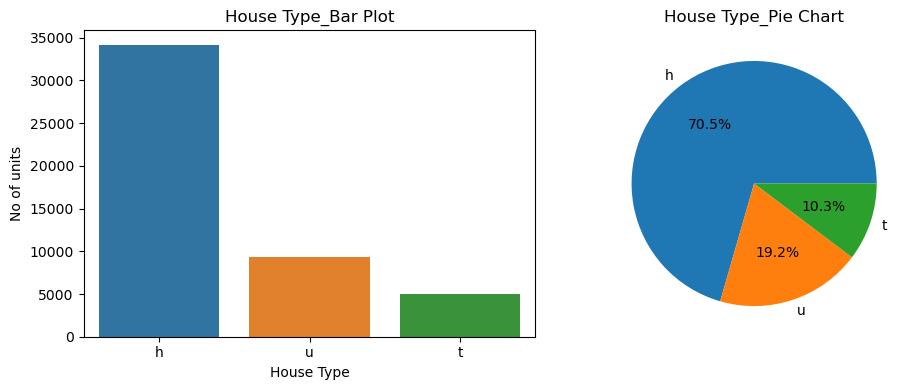

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.barplot(x=TYPE.index,y=TYPE.values,hue=TYPE.index,ax=ax1)
ax1.set_title('House Type_Bar Plot')
ax1.set_xlabel('House Type')
ax1.set_ylabel("No of units")
ax2.pie(TYPE.values,labels=TYPE.index,autopct='%1.1f%%')
ax2.set_title('House Type_Pie Chart')
plt.tight_layout()
plt.show()

Findings:
1.Largest property is h(House) type(70.5%),then u (Unit) type(19.2%) and then t (town) type(10.3%)


let's explore Seller G feature

In [17]:
data1['SellerG'].value_counts()

SellerG
Barry            4818
Jellis           4088
Nelson           4008
Ray              3653
hockingstuart    3465
                 ... 
Flanagan            1
Fletchers/One       1
CarlinSmith         1
Hodges/Buxton       1
Cocoon              1
Name: count, Length: 422, dtype: int64

In [18]:
#there are 422 seller,extract top 12 sellers
top_12_seller=data1['SellerG'].value_counts()[:12]
top_12_seller

SellerG
Barry            4818
Jellis           4088
Nelson           4008
Ray              3653
hockingstuart    3465
Buxton           2580
Marshall         1721
Fletchers        1160
Biggin           1022
Harcourts         912
Brad              911
YPA               897
Name: count, dtype: int64

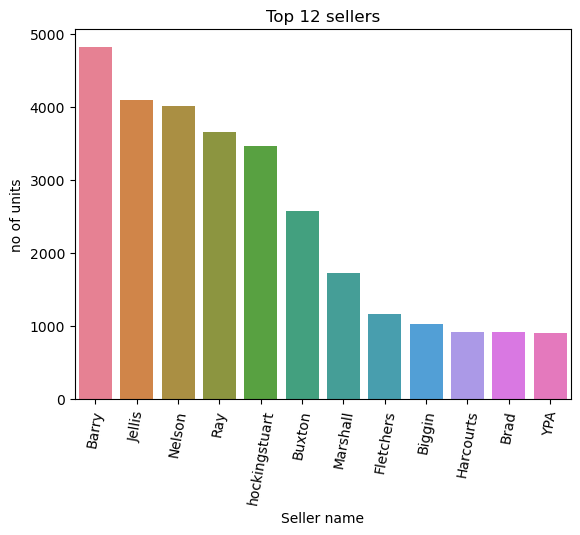

In [19]:
sns.barplot(x=top_12_seller.index,y=top_12_seller.values,hue=top_12_seller.index)
plt.title("Top 12 sellers")
plt.xlabel('Seller name')
plt.ylabel('no of units')
plt.xticks(rotation=80)
plt.show()

let's explore a particular  seller sold which type of property(h,u or t).

In [21]:
def seller_vs_type_plot(df,seller):
    S=df[df['SellerG']==seller]['Type'].value_counts()
    plt.figure(figsize=(4,4)) 
    plt.pie(S.values,labels=S.index,autopct='%1.1f%%')
    plt.title(f"Pie chrt:{seller} ")
    plt.show()
    



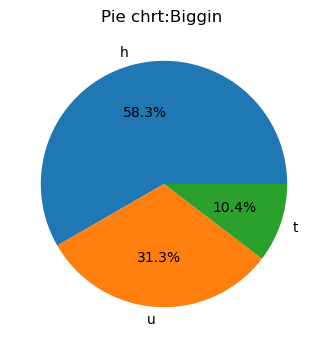

In [22]:
#plot for 'Biggin' seller
seller_vs_type_plot(data1,'Biggin')


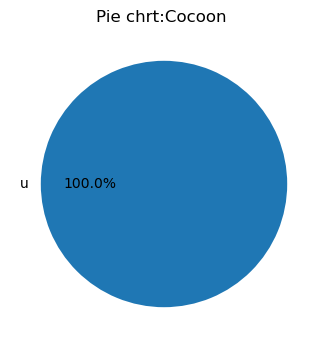

In [23]:
# pie chart for 'Cocoon' seller
seller_vs_type_plot(data1,'Cocoon')

plot pie chart to top 10 sellers, to explore types of proprties they sold out.

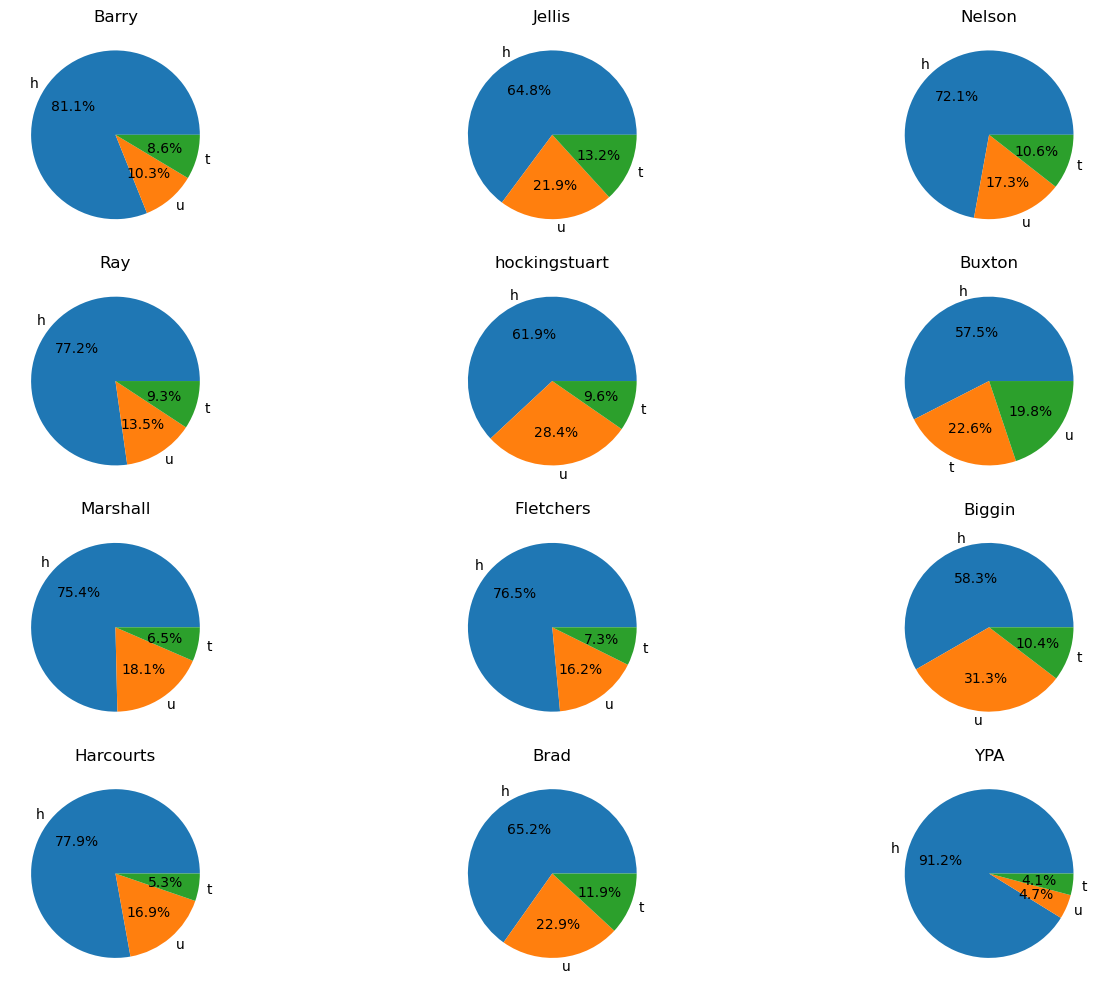

In [25]:
# Create a single figure with a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# Flatten the axes array to iterate easily
axes = axes.flatten()

# Loop through the top 10 sellers and create a pie chart for each
for i, name in enumerate(top_12_seller.index):
    ax = axes[i]  # Select the correct subplot
    S = data1[data1['SellerG'] == name]['Type'].value_counts()
    ax.pie(S.values, labels=S.index, autopct='%1.1f%%')
    ax.set_title(f'{name}')

# Adjust layout
plt.tight_layout()
plt.show()


Explore Method feature

In [27]:
data1['Method'].unique()

array(['S', 'SP', 'VB', 'PI', 'SA'], dtype=object)

In [28]:
METHOD=data1['Method'].value_counts()
METHOD

Method
S     30624
SP     6480
PI     5940
VB     5024
SA      365
Name: count, dtype: int64

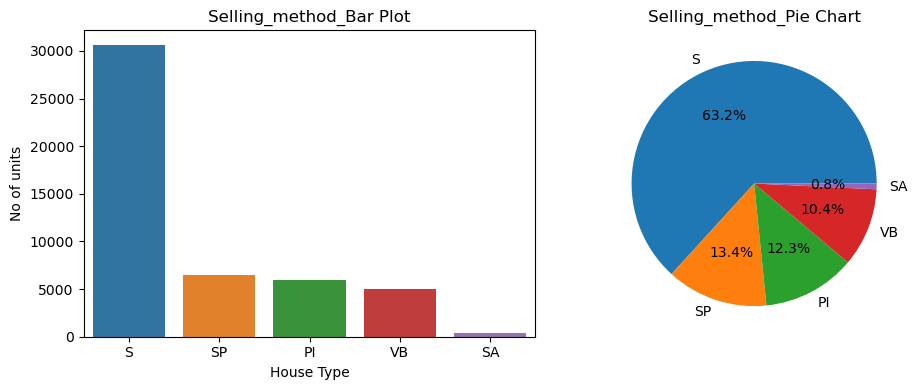

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.barplot(x=METHOD.index,y=METHOD.values,hue=METHOD.index,ax=ax1)
ax1.set_title('Selling_method_Bar Plot')
ax1.set_xlabel('House Type')
ax1.set_ylabel("No of units")
ax2.pie(METHOD.values,labels=METHOD.index,autopct='%1.1f%%')
ax2.set_title('Selling_method_Pie Chart')
plt.tight_layout()
plt.show()

Findings:
1.Maximum properties sold out by 'S' method,followed by 'SP' method, then 'PI','VB' and 'SA' method.

Explore 'Room' feature

In [32]:
data1['Rooms'].unique()

array([ 3,  2,  4,  1,  5,  7,  6,  8, 11, 10,  9, 12, 31, 16],
      dtype=int64)

In [33]:
data1['Rooms'].describe()

count    48433.000000
mean         3.071666
std          0.944708
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         31.000000
Name: Rooms, dtype: float64

In [34]:
ROOM=data1['Rooms'].value_counts()


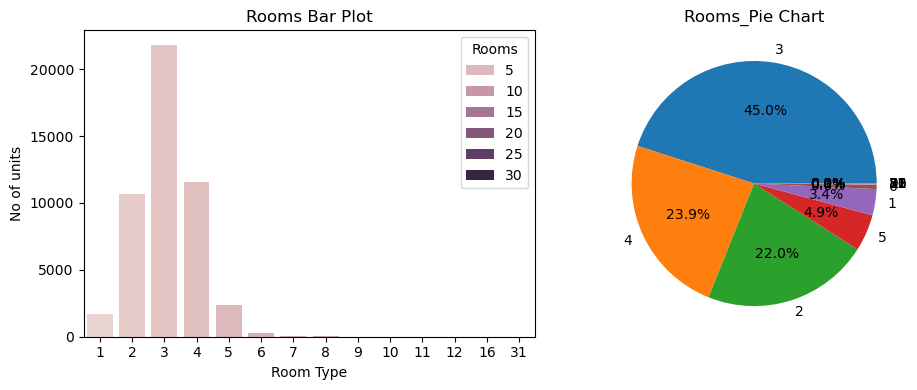

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.barplot(x=ROOM.index,y=ROOM.values,hue=ROOM.index,ax=ax1)
ax1.set_title('Rooms Bar Plot')
ax1.set_xlabel('Room Type')
ax1.set_ylabel("No of units")
ax2.pie(ROOM.values,labels=ROOM.index,autopct='%1.1f%%')
ax2.set_title('Rooms_Pie Chart')
plt.tight_layout()
plt.show()

Findings:
1. Maximum rooms types are 3,4,2,5 and 1, rest can be cosidered as outliers.

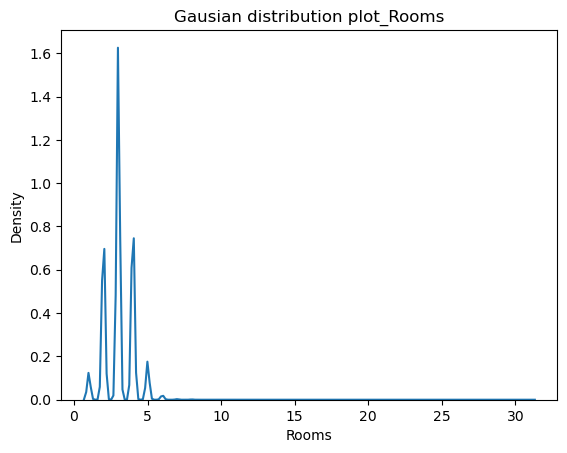

In [37]:
sns.kdeplot(data1['Rooms'])
plt.title("Gausian distribution plot_Rooms")
plt.show()

In [38]:
data1['Date'] = pd.to_datetime(data1['Date'], format='%d/%m/%Y')



In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48433 entries, 0 to 48432
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         48433 non-null  object        
 1   Address        48433 non-null  object        
 2   Rooms          48433 non-null  int64         
 3   Type           48433 non-null  object        
 4   Price          48433 non-null  float64       
 5   Method         48433 non-null  object        
 6   SellerG        48433 non-null  object        
 7   Date           48433 non-null  datetime64[ns]
 8   Postcode       48433 non-null  int64         
 9   Regionname     48433 non-null  object        
 10  Propertycount  48433 non-null  int64         
 11  Distance       48433 non-null  float64       
 12  CouncilArea    48433 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [40]:
data1['Date'].value_counts()

Date
2018-03-24    880
2017-10-28    879
2018-03-17    753
2016-11-27    753
2017-12-09    724
             ... 
2017-09-30     18
2018-01-20     12
2018-01-27     11
2018-03-31     11
2016-01-28     10
Name: count, Length: 112, dtype: int64

Analyze per month basis

In [42]:
data1['month']=data1['Date'].dt.month
data1['year']=data1['Date'].dt.year

In [43]:
data1['month'].unique()

array([ 4,  7,  9,  6,  2,  3, 12,  8, 11,  5,  1, 10])

In [44]:
total_sales=data1['Price'].sum()
def month_sales(df,month,sales=total_sales):
    monthly_sale_share=df['Price'].loc[df['month']==month].sum()/sales
    return monthly_sale_share

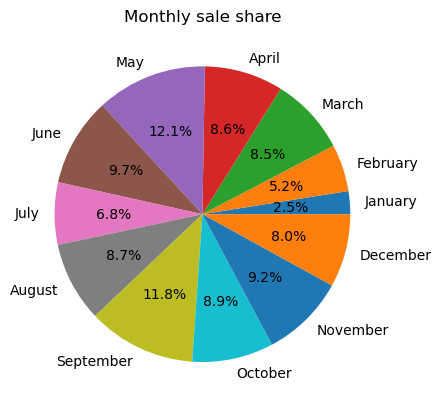

In [45]:
Jan_sale=month_sales(data1,1)
Feb_sale=month_sales(data1,2)
March_sale=month_sales(data1,3)
April_sale=month_sales(data1,4)
May_sale=month_sales(data1,5)
June_sale=month_sales(data1,6)
July_sale=month_sales(data1,7)
Aug_sale=month_sales(data1,8)
Sep_sale=month_sales(data1,9)
Oct_sale=month_sales(data1,10)
Nov_sale=month_sales(data1,11)
Dec_sale=month_sales(data1,12)

monthly_sale=[Jan_sale,Feb_sale,March_sale,April_sale,May_sale,June_sale,July_sale,Aug_sale,Sep_sale,Oct_sale,Nov_sale,Dec_sale]
labels=['January','February','March','April','May','June','July','August','September','October','November','December']

plt.pie(monthly_sale,labels=labels,autopct='%1.1f%%')
plt.title('Monthly sale share')
plt.show()


Findings:
1.May month have highest sale on the other hand January month have lowest.

In [47]:
data1['year'].unique()

array([2017, 2018, 2016])

In [106]:
total_sale_2016=data1['Price'].loc[data1['year']==2016].sum()/1000000000
total_sale_2017=data1['Price'].loc[data1['year']==2017].sum()/1000000000
total_sale_2018=data1['Price'].loc[data1['year']==2018].sum()/1000000000

In [108]:
yearly_sale=[total_sale_2016,total_sale_2017,total_sale_2018]

In [110]:
years=['2016','2017','2018']

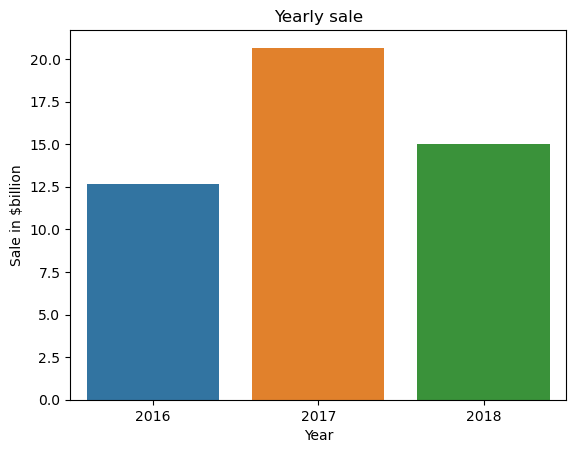

In [118]:
sns.barplot(x=years,y=yearly_sale,hue=years)
plt.title('Yearly sale')
plt.ylabel('Sale in $billion')
plt.xlabel('Year')
plt.show()

Findings:
1. Sale in 2017 is hightest and lowest in 2016.

Now,let's explore monthly sale in every year.

In [162]:
def monthly_sale_year(df,month,year):
    return data1['Price'].loc[(data1['year']==year) & (data1['month']==month)].sum()/1000000000

In [164]:
# monthly_sale_2016
Jan_2016_sale=monthly_sale_year(data1,1,2016)
Jan_2016_sale=monthly_sale_year(data1,2,2016)
March_2016_sale=monthly_sale_year(data1,3,2016)
April_2016_sale=monthly_sale_year(data1,4,2016)
May_2016_sale=monthly_sale_year(data1,5,2016)
June_2016_sale=monthly_sale_year(data1,6,2016)
July_2016_sale=monthly_sale_year(data1,7,2016)
Aug_2016_sale=monthly_sale_year(data1,8,2016)
Sep_2016_sale=monthly_sale_year(data1,9,2016)
Oct_2016_sale=monthly_sale_year(data1,10,2016)
Nov_2016_sale=monthly_sale_year(data1,11,2016)
Dec_2016_sale=monthly_sale_year(data1,12,2016)

monthly_sale_2016=[Jan_2016_sale,Jan_2016_sale,March_2016_sale,April_2016_sale,May_2016_sale,June_2016_sale,July_2016_sale,Aug_2016_sale,
                  Sep_2016_sale,Oct_2016_sale,Nov_2016_sale,Dec_2016_sale]
labels=['January','February','March','April','May','June','July','August','September','October','November','December']


In [168]:
# monthly_sale_2017
def monthly_sale_2017(df,month,year=2017):
    return data1['Price'].loc[(data1['year']==year) & (data1['month']==month)].sum()/1000000000

month_sale_2017=[]
for i in range(1,13):
    sale=monthly_sale_2017(data1,i)
    month_sale_2017.append(sale)

In [173]:
# monthly_sale_2018
def monthly_sale_2018(df,month,year=2018):
    return data1['Price'].loc[(data1['year']==year) & (data1['month']==month)].sum()/1000000000

month_sale_2018=[]
for i in range(1,13):
    sale=monthly_sale_2018(data1,i)
    month_sale_2018.append(sale)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11772\2652576444.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,rotation=90)


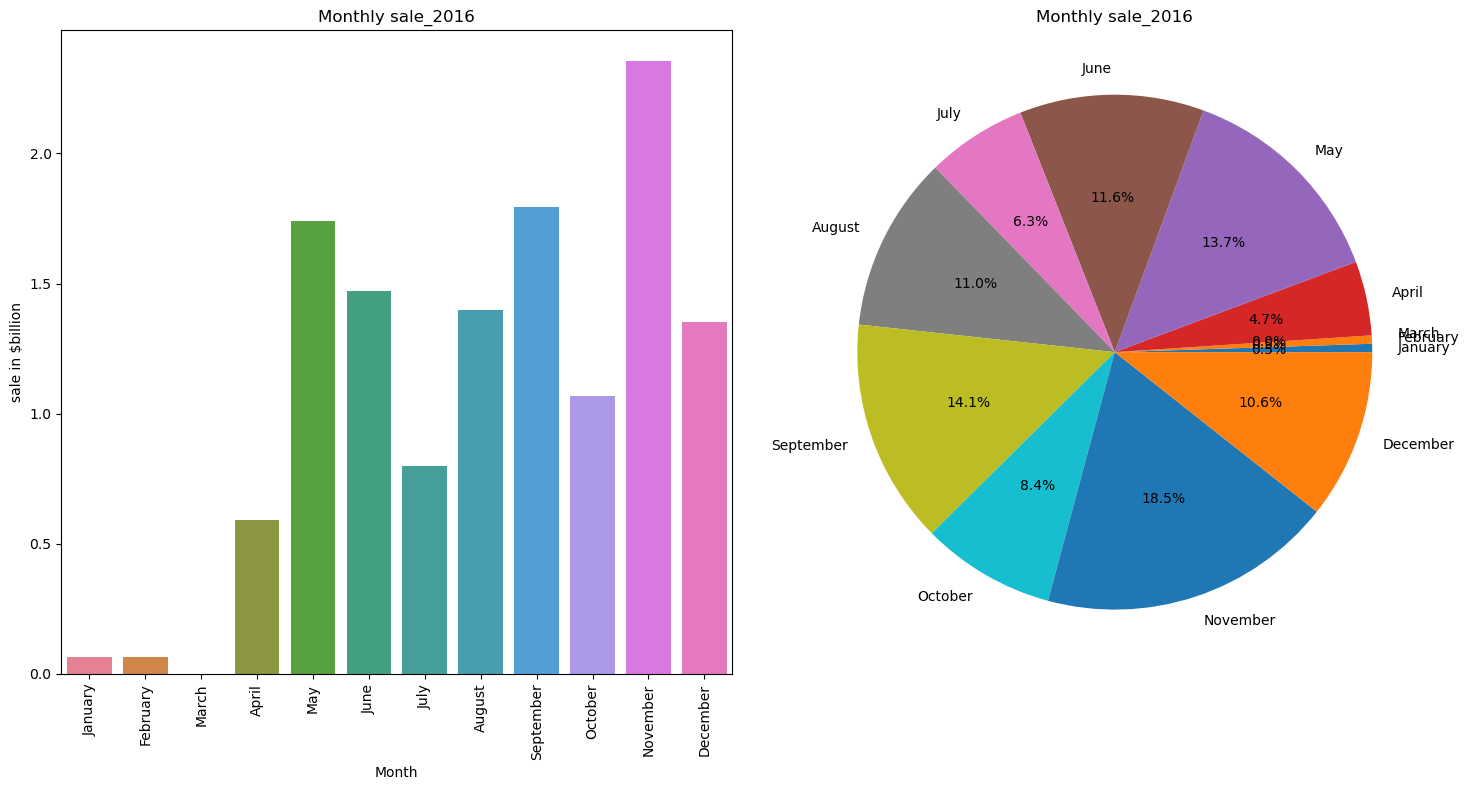

In [199]:
# Plot for 2016
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=labels,y=monthly_sale_2016,hue=labels,ax=ax1)
ax1.set_title('Monthly sale_2016')
ax1.set_xlabel("Month")
ax1.set_ylabel('sale in $billion')
ax1.set_xticklabels(labels,rotation=90)
ax2.pie(monthly_sale_2016,labels=labels,autopct='%1.1f%%')
ax2.set_title('Monthly sale_2016')
plt.tight_layout()
plt.show()


Findings:
1.Highest sale in Nov month while lowest in March.Noted that no sale in March month.  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11772\851124335.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,rotation=90)


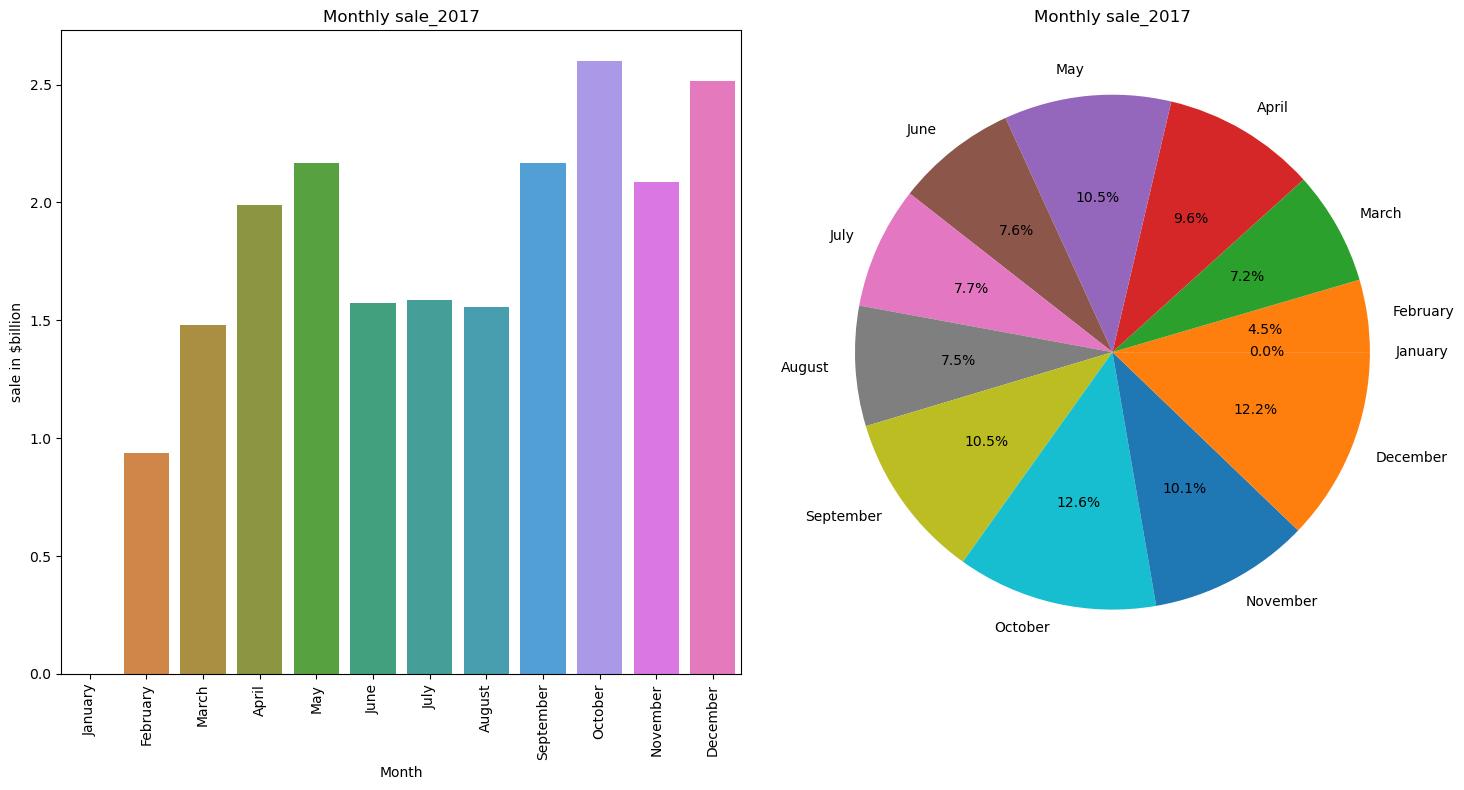

In [202]:
# Plot for 2017
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=labels,y=month_sale_2017,hue=labels,ax=ax1)
ax1.set_title('Monthly sale_2017')
ax1.set_xlabel("Month")
ax1.set_ylabel('sale in $billion')
ax1.set_xticklabels(labels,rotation=90)
ax2.pie(month_sale_2017,labels=labels,autopct='%1.1f%%')
ax2.set_title('Monthly sale_2017')
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11772\2357077522.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,rotation=90)


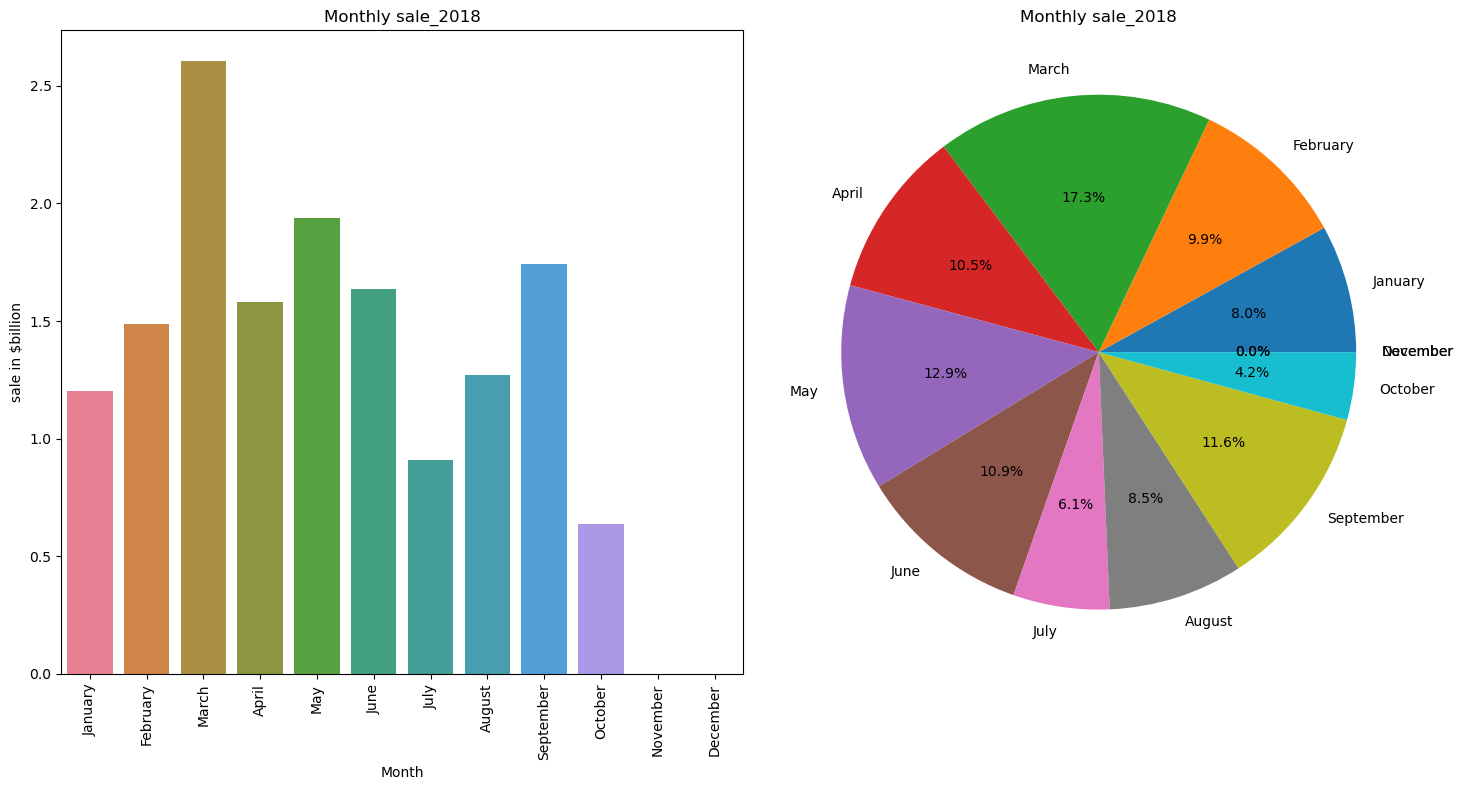

In [204]:
# Plot for 2018
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=labels,y=month_sale_2018,hue=labels,ax=ax1)
ax1.set_title('Monthly sale_2018')
ax1.set_xlabel("Month")
ax1.set_ylabel('sale in $billion')
ax1.set_xticklabels(labels,rotation=90)
ax2.pie(month_sale_2018,labels=labels,autopct='%1.1f%%')
ax2.set_title('Monthly sale_2018')
plt.tight_layout()
plt.show()

Explore sale in each region

In [217]:
REGION=data1['Regionname'].unique()


In [226]:
def regional_sale(df,region):
    return df['Price'].loc[df['Regionname']==region].sum()/1000000000

In [228]:
region_sale=[]
for region in REGION:
    region_sale.append(regional_sale(data1,region))
    

In [232]:
region_sale

[11.200942445,
 7.748997708,
 17.232560008,
 3.393403015,
 8.129887281,
 0.292602388,
 0.257823935,
 0.07498875]

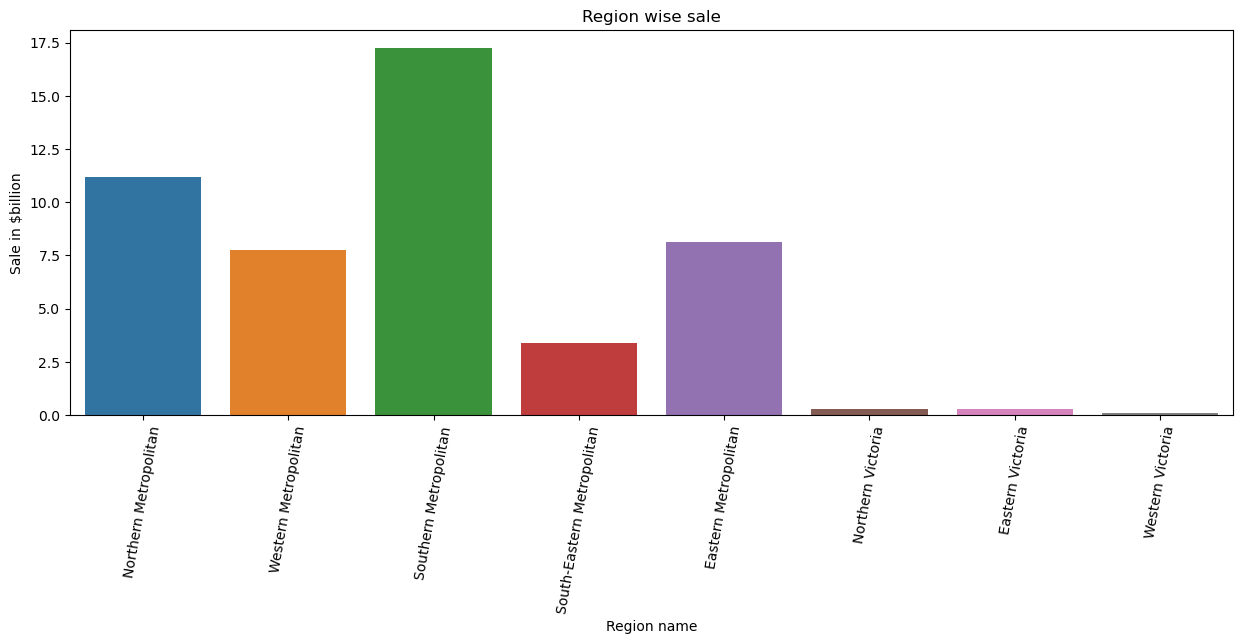

In [238]:
plt.figure(figsize=(15,5))
sns.barplot(x=REGION,y=region_sale,hue=REGION)
plt.title('Region wise sale')
plt.xlabel('Region name')
plt.ylabel('Sale in $billion')
plt.xticks(rotation=80)
plt.show()

Findings:
1.Sothern Metropolitan is highest sale area followed by Northern.
2.Northern Victoria,Easetern Victoria and Western Victoria are lowest sale regions.